# Multivariable control : exercise session 1 (modal decomposition)
## Ex. 3 : satellite simulation

In [1]:
import numpy as np
import numpy.linalg as lng
import scipy.linalg as lngs
import control.matlab as mt
import matplotlib.pyplot as plt
plt.style.use("default")
plt.rcParams['font.size'] = 13
plt.rcParams['axes.linewidth'] = 1.5

In [15]:
T = 0.01 # Sampling time
kappa = 0.091
b = 0.0036
J1 = 1 # Inertias
J2 = 0.1
# System matrices
A = np.array([[1,T,0,0],[-T*kappa/J2,1-T*b/J2,T*kappa/J2,T*b/J2],[0,0,1,T],[T*kappa/J1,T*b/J1,-T*kappa/J1,1-T*b/J1]])
B = np.array([[0],[0],[0],[T/J1]])
C = np.array([0,1,0,0])
eigA = lng.eig(A)[0]
print('System eigenvalues : ',eigA)

System eigenvalues :  [0.999802+0.01000304j 0.999802-0.01000304j 1.      +0.j
 1.      +0.j        ]


There is one eigenvalue $\lambda =1$ with algebraic multiplicity $n=2$. Might generate unbounded modes. Need to compute the geometric multiplicity of this eigenvalue by computing the null space associated to $(A - \lambda I)\vec{v}=\vec{0}$.

In [3]:
A_m_lambdaI = A - np.eye(4)
null_A = lngs.null_space(A_m_lambdaI)
print(null_A)

[[ 7.07106781e-01]
 [-1.11358892e-16]
 [ 7.07106781e-01]
 [-5.64317521e-18]]


It looks like $\nu = 2 = n$, thus no unbounded mode. Now, let's simulate the free output for $200 \ [s]$.

In [16]:
system = mt.ss(A,B,C,*_,T)
time = np.arange(0,200,T)
X0 = np.array([0,0,0.1,0])
y_out, time, x_out = mt.lsim(system, T=time, X0=X0)

ValueError: Needs 1, 4, or 5 arguments; received 104.

(<matplotlib.legend.Legend at 0x2633179f730>, None)

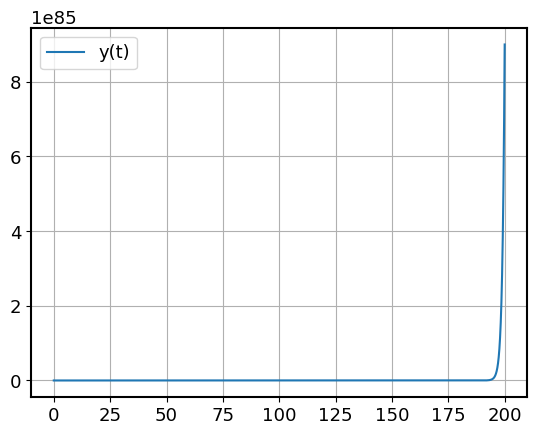

In [11]:
fig = plt.plot(constrained_layout = True, figsize=(20,5))
plt.plot(time, y_out, label='y(t)')
plt.legend(), plt.grid()

C:\Users\cedri\anaconda3\lib\site-packages\control\timeresp.py:1149: UserWarning: System has direct feedthrough: ``D != 0``. The infinite impulse at ``t=0`` does not appear in the output.
Results may be meaningless!
  warnings.warn("System has direct feedthrough: ``D != 0``. The "


(<matplotlib.legend.Legend at 0x263305575b0>, None)

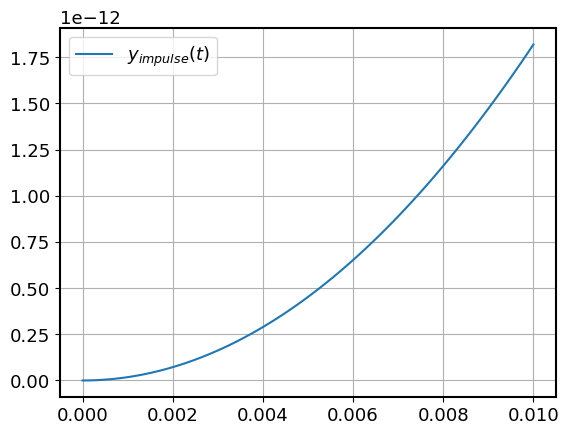

In [14]:
y_out_imp, t_imp = mt.impulse(system, T)
fig = plt.plot(constrained_layout = True, figsize=(20,5))
plt.plot(t_imp, y_out_imp, label=r'$y_{impulse}(t)$')
plt.legend(), plt.grid()